In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Clean_Data.csv', sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67338 entries, 0 to 67337
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             67338 non-null  int64  
 1   student_email          67338 non-null  object 
 2   group_id               67338 non-null  int64  
 3   group_title            67338 non-null  object 
 4   prep_email             67338 non-null  object 
 5   date_first_l           67338 non-null  object 
 6   feat_class             67338 non-null  int64  
 7   feat_group_format      67338 non-null  object 
 8   feat_group_weeks       67338 non-null  int64  
 9   feat_group_size        67338 non-null  int64  
 10  feat_attendance        67338 non-null  float64
 11  feat_HW                67338 non-null  float64
 12  feat_HW_right          67338 non-null  float64
 13  feat_theory_read       67338 non-null  float64
 14  feat_TK                67338 non-null  float64
 15  fe

In [281]:
df[['feat_group_format','feat_payment_type', 'feat_payment_place']] = df[['feat_group_format','feat_payment_type', 'feat_payment_place']].astype('category')

In [282]:
df = df.drop(['student_id', 'student_email', 'group_id', 'group_title', 'prep_email', 'date_first_l'], axis=1)

In [283]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_df = df[numeric_cols]

category_cols = df.select_dtypes(include=['category']).columns
category_df = df[category_cols]

In [284]:
from sklearn.preprocessing import OneHotEncoder

In [285]:
ohe = OneHotEncoder(sparse_output=False, dtype=int)
ohe_df = pd.DataFrame(ohe.fit_transform(category_df[['feat_group_format']]), columns=ohe.get_feature_names_out(['feat_group_format']))
encoded_ohe_df = pd.concat([category_df, ohe_df], axis=1) # В том случае, если хотим добавить закодированные данные


In [286]:
ohe = OneHotEncoder(sparse_output=False, dtype=int)
ohe_df_1 = pd.DataFrame(ohe.fit_transform(category_df[['feat_payment_type']]), columns=ohe.get_feature_names_out(['feat_payment_type']))
encoded_ohe_df = pd.concat([encoded_ohe_df, ohe_df_1], axis=1) # В том случае, если хотим добавить закодированные данные

In [287]:
ohe = OneHotEncoder(sparse_output=False, dtype=int)
ohe_df_2 = pd.DataFrame(ohe.fit_transform(category_df[['feat_payment_place']]), columns=ohe.get_feature_names_out(['feat_payment_place']))
encoded_ohe_df = pd.concat([encoded_ohe_df, ohe_df_2], axis=1) # В том случае, если хотим добавить закодированные данные


In [288]:
encoded_ohe_df = encoded_ohe_df.drop(['feat_group_format', 'feat_payment_type', 'feat_payment_place'], axis=1)
encoded_ohe_df # датафрейм с закодированными категориальными данными

,feat_group_format_Блендед,feat_group_format_Микро,feat_group_format_Мини,feat_group_format_Онлайн+Класс,feat_group_format_Стандарт,feat_payment_type_Kомбо,feat_payment_type_Paccpoчка банка,feat_payment_type_Бронирование,feat_payment_type_Буст,feat_payment_type_Единовременная,feat_payment_type_Материнский капитал,feat_payment_type_Позтапная,feat_payment_type_Рекуррентная,feat_payment_place_Cepвep,feat_payment_place_Cайт,feat_payment_place_ДОД,feat_payment_place_ИK,feat_payment_place_ИК,feat_payment_place_Навигатор
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67333,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
67334,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
67335,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
67336,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [289]:
from sklearn.preprocessing import StandardScaler

In [290]:
scaler = StandardScaler()
target = df['target']
df_no_target = numeric_df.drop(['target'], axis=1)
numeric_df_scaled = pd.DataFrame(scaler.fit_transform(df_no_target), columns = df_no_target.columns)

In [291]:
numeric_df_scaled

,feat_class,feat_group_weeks,feat_group_size,feat_attendance,feat_HW,feat_HW_right,feat_theory_read,feat_TK,feat_LB,feat_tickets_we_need,feat_tickets_mb_term,feat_term_perc,feat_good_agr_before,feat_prep_attendence,feat_prep_HW,feat_prep_OpenLessons
0,-0.275402,-1.858754,-0.586125,0.541530,0.576405,0.954100,-0.368129,1.492962,0.087499,-0.301384,-0.113249,1.478955,0.254924,0.0,-3.254296e-15,-1.258926e-15
1,-0.275402,-1.858754,-0.586125,-2.195816,-0.487926,-0.321027,-0.399326,-1.752312,-0.921410,-0.301384,-0.113249,2.487734,0.254924,0.0,-3.254296e-15,-1.258926e-15
2,-0.275402,-1.858754,-0.586125,0.541530,-1.220288,-0.960547,-0.680096,1.492962,0.087499,2.252791,-0.113249,1.222009,0.254924,0.0,-3.254296e-15,-1.258926e-15
3,-0.275402,-1.858754,-0.586125,0.541530,0.651690,0.640264,-0.087359,1.492962,0.087499,0.550007,-0.113249,2.487734,0.254924,0.0,-3.254296e-15,-1.258926e-15
4,-0.275402,-1.858754,-0.586125,0.541530,-1.260046,-1.093117,0.380591,1.492962,0.087499,2.252791,-0.113249,0.380789,0.254924,0.0,-3.254296e-15,-1.258926e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67333,-1.382106,-1.256400,-0.428756,0.061294,-1.192993,-1.052948,-1.179243,-0.454202,-0.921410,-0.301384,-0.113249,1.609501,0.254924,0.0,1.923542e+00,4.838185e-01
67334,-1.382106,-1.256400,-0.428756,0.301412,-0.670482,-0.501408,-0.648900,-0.129675,-0.416955,-0.301384,-0.113249,-0.381858,0.254924,0.0,1.923542e+00,4.838185e-01
67335,-1.382106,-1.256400,-0.428756,0.541530,0.111269,0.177180,1.753245,0.843907,-0.416955,-0.301384,-0.113249,-0.397899,0.254924,0.0,1.923542e+00,4.838185e-01
67336,-1.382106,-1.256400,-0.428756,0.541530,0.657400,0.286419,1.753245,1.492962,-1.425864,-0.301384,-0.113249,0.274231,0.254924,0.0,1.923542e+00,4.838185e-01


In [292]:
numeric_df_scaled.describe()

,feat_class,feat_group_weeks,feat_group_size,feat_attendance,feat_HW,feat_HW_right,feat_theory_read,feat_TK,feat_LB,feat_tickets_we_need,feat_tickets_mb_term,feat_term_perc,feat_good_agr_before,feat_prep_attendence,feat_prep_HW,feat_prep_OpenLessons
count,6.733800e+04,6.733800e+04,6.733800e+04,6.733800e+04,6.733800e+04,6.733800e+04,6.733800e+04,6.733800e+04,6.733800e+04,6.733800e+04,6.733800e+04,6.733800e+04,6.733800e+04,6.733800e+04,6.733800e+04,6.733800e+04
mean,7.698654e-16,-2.903878e-16,-2.701282e-17,-2.574660e-17,2.253882e-16,4.904515e-16,-1.004539e-16,2.667516e-16,-5.845743e-17,6.753205e-17,-4.051923e-17,-2.616867e-17,1.088954e-16,1.296615e-15,-1.544374e-15,4.389584e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.382106e+00,-3.816403e+00,-8.221787e-01,-4.260831e+00,-2.065766e+00,-1.891290e+00,-1.366423e+00,-1.752312e+00,-1.425864e+00,-3.013844e-01,-1.132491e-01,-2.638454e+00,-3.922745e+00,-8.259267e+00,-7.203921e+00,-6.603307e+00
25%,-1.382106e+00,-5.169224e-02,-3.894136e-01,-3.475361e-02,-7.262618e-01,-7.603907e-01,-8.984730e-01,-8.111824e-01,-9.214097e-01,-3.013844e-01,-1.132491e-01,-6.324990e-01,2.549235e-01,-5.474965e-01,-5.598472e-01,-7.209929e-01
50%,8.313018e-01,5.506615e-01,-2.320445e-01,4.454825e-01,1.988054e-01,9.691839e-02,-1.497527e-01,-3.231683e-02,8.749931e-02,-3.013844e-01,-1.132491e-01,-6.913740e-02,2.549235e-01,3.829787e-03,4.636922e-02,-1.258926e-15
75%,8.313018e-01,5.506615e-01,-7.467542e-02,5.415297e-01,8.648473e-01,8.116816e-01,8.485411e-01,8.439070e-01,1.096408e+00,-3.013844e-01,-1.132491e-01,6.726646e-01,2.549235e-01,6.993693e-01,6.614900e-01,4.838185e-01
max,8.313018e-01,8.518384e-01,6.770881e+00,5.415297e-01,1.275542e+00,1.993362e+00,1.753245e+00,1.492962e+00,1.219441e+01,2.013202e+01,3.410584e+01,1.225190e+01,2.549235e-01,1.869690e+00,2.566776e+00,1.901244e+00


In [293]:
final_dataset_prep = pd.concat([numeric_df_scaled, encoded_ohe_df,target], axis=1)
final_dataset_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67338 entries, 0 to 67337
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   feat_class                             67338 non-null  float64
 1   feat_group_weeks                       67338 non-null  float64
 2   feat_group_size                        67338 non-null  float64
 3   feat_attendance                        67338 non-null  float64
 4   feat_HW                                67338 non-null  float64
 5   feat_HW_right                          67338 non-null  float64
 6   feat_theory_read                       67338 non-null  float64
 7   feat_TK                                67338 non-null  float64
 8   feat_LB                                67338 non-null  float64
 9   feat_tickets_we_need                   67338 non-null  float64
 10  feat_tickets_mb_term                   67338 non-null  float64
 11  fe

In [294]:
final_dataset_prep

,feat_class,feat_group_weeks,feat_group_size,feat_attendance,feat_HW,feat_HW_right,feat_theory_read,feat_TK,feat_LB,feat_tickets_we_need,...,feat_payment_type_Материнский капитал,feat_payment_type_Позтапная,feat_payment_type_Рекуррентная,feat_payment_place_Cepвep,feat_payment_place_Cайт,feat_payment_place_ДОД,feat_payment_place_ИK,feat_payment_place_ИК,feat_payment_place_Навигатор,target
0,-0.275402,-1.858754,-0.586125,0.541530,0.576405,0.954100,-0.368129,1.492962,0.087499,-0.301384,...,0,0,0,0,0,0,1,0,0,0
1,-0.275402,-1.858754,-0.586125,-2.195816,-0.487926,-0.321027,-0.399326,-1.752312,-0.921410,-0.301384,...,0,0,0,0,0,0,1,0,0,1
2,-0.275402,-1.858754,-0.586125,0.541530,-1.220288,-0.960547,-0.680096,1.492962,0.087499,2.252791,...,0,1,0,0,0,0,1,0,0,0
3,-0.275402,-1.858754,-0.586125,0.541530,0.651690,0.640264,-0.087359,1.492962,0.087499,0.550007,...,0,0,0,0,0,0,1,0,0,0
4,-0.275402,-1.858754,-0.586125,0.541530,-1.260046,-1.093117,0.380591,1.492962,0.087499,2.252791,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67333,-1.382106,-1.256400,-0.428756,0.061294,-1.192993,-1.052948,-1.179243,-0.454202,-0.921410,-0.301384,...,0,0,0,0,0,0,1,0,0,0
67334,-1.382106,-1.256400,-0.428756,0.301412,-0.670482,-0.501408,-0.648900,-0.129675,-0.416955,-0.301384,...,1,0,0,0,0,0,1,0,0,0
67335,-1.382106,-1.256400,-0.428756,0.541530,0.111269,0.177180,1.753245,0.843907,-0.416955,-0.301384,...,0,0,0,0,0,0,1,0,0,0
67336,-1.382106,-1.256400,-0.428756,0.541530,0.657400,0.286419,1.753245,1.492962,-1.425864,-0.301384,...,0,0,0,0,0,0,1,0,0,0


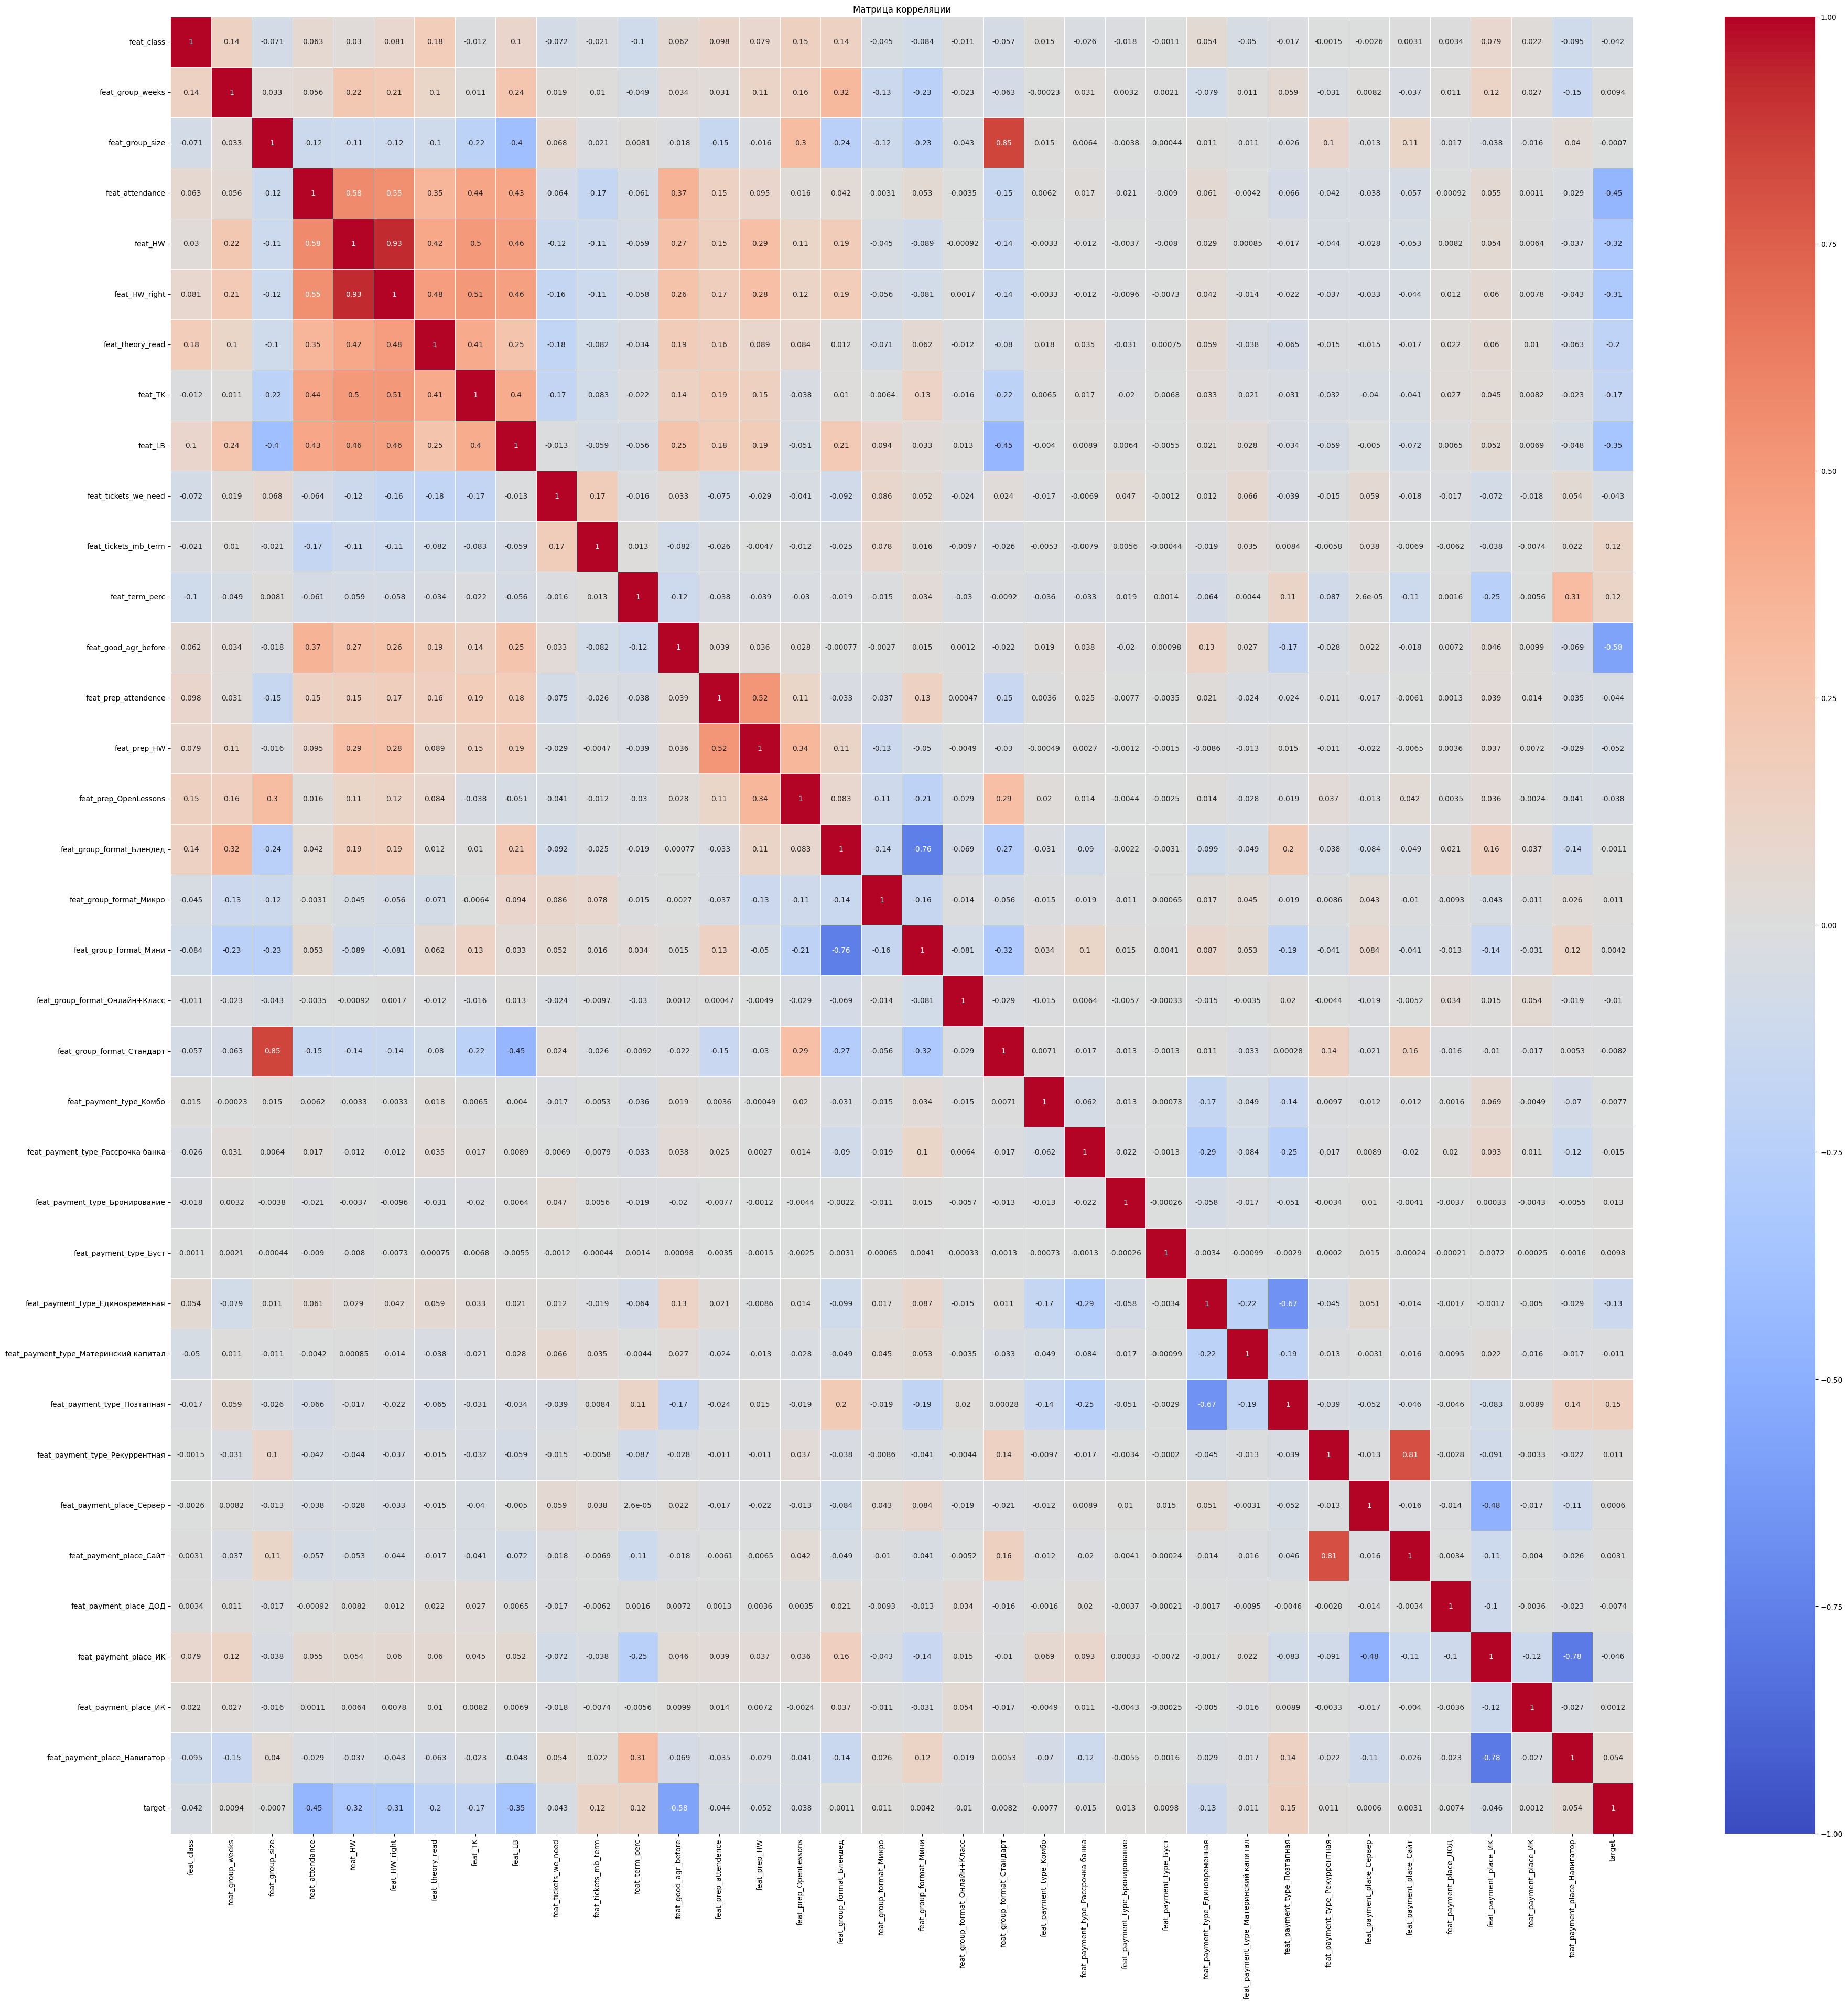

In [295]:
corr_matrix = final_dataset_prep.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(45, 45))
sns.heatmap(
    corr_matrix,
    annot=True,  # Показывать значения в ячейках
    cmap='coolwarm',  # Цветовая схема
    vmin=-1, vmax=1,  # Диапазон для шкалы
    linewidths=0.5    # Границы между ячейками
)
plt.title('Матрица корреляции')
plt.show()

In [296]:
# Выделяем строку корреляции с целевой переменной
target_corr = corr_matrix['target'].abs().sort_values(ascending=False)

# Выбираем признаки с корреляцией выше порога (например, 0.3)
strong_features = target_corr[target_corr > 0.1].index.tolist()
strong_features.remove('target')  # Исключаем саму целевую переменную

print(f"Лучшие признаки: {strong_features}")

Лучшие признаки: ['feat_good_agr_before', 'feat_attendance', 'feat_LB', 'feat_HW', 'feat_HW_right', 'feat_theory_read', 'feat_TK', 'feat_payment_type_Позтапная', 'feat_payment_type_Единовременная', 'feat_tickets_mb_term', 'feat_term_perc']


# Model Training

In [297]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [298]:
final_dataset_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67338 entries, 0 to 67337
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   feat_class                             67338 non-null  float64
 1   feat_group_weeks                       67338 non-null  float64
 2   feat_group_size                        67338 non-null  float64
 3   feat_attendance                        67338 non-null  float64
 4   feat_HW                                67338 non-null  float64
 5   feat_HW_right                          67338 non-null  float64
 6   feat_theory_read                       67338 non-null  float64
 7   feat_TK                                67338 non-null  float64
 8   feat_LB                                67338 non-null  float64
 9   feat_tickets_we_need                   67338 non-null  float64
 10  feat_tickets_mb_term                   67338 non-null  float64
 11  fe

## 1. Model with all features

In [299]:
X = final_dataset_prep.drop('target', axis=1)  # Все колонки, кроме целевой
y = final_dataset_prep['target']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% данных на тест
    random_state=42,  # Для воспроизводимости
    stratify=y       # Сохраняет баланс классов
)

model1 = LogisticRegression(
    penalty='l2',       # Регуляризация L2 (по умолчанию)
    C=1.0,              # Сила регуляризации (меньше C → сильнее регуляризация)
    solver='lbfgs',     # Алгоритм оптимизации (для небольших датасетов)
    max_iter=1000       # Максимальное число итераций
)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [300]:
y_pred = model1.predict(X_test) # Бинарные предсказания (0 или 1)

In [301]:
print(classification_report(y_test, y_pred))
print(f'Среднее значение f1-score при кроссвалидации: {round(cross_val_score(model1, X_test, y_test, cv=5, scoring='f1').mean(),2)}')

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     11659
           1       0.85      0.52      0.65      1809

    accuracy                           0.92     13468
   macro avg       0.89      0.75      0.80     13468
weighted avg       0.92      0.92      0.92     13468

Среднее значение f1-score при кроссвалидации: 0.65


## 2. Model with correlating features

In [302]:
corr_features_df = final_dataset_prep[strong_features]

In [303]:
corr_features_df

,feat_good_agr_before,feat_attendance,feat_LB,feat_HW,feat_HW_right,feat_theory_read,feat_TK,feat_payment_type_Позтапная,feat_payment_type_Единовременная,feat_tickets_mb_term,feat_term_perc
0,0.254924,0.541530,0.087499,0.576405,0.954100,-0.368129,1.492962,0,1,-0.113249,1.478955
1,0.254924,-2.195816,-0.921410,-0.487926,-0.321027,-0.399326,-1.752312,0,1,-0.113249,2.487734
2,0.254924,0.541530,0.087499,-1.220288,-0.960547,-0.680096,1.492962,1,0,-0.113249,1.222009
3,0.254924,0.541530,0.087499,0.651690,0.640264,-0.087359,1.492962,0,1,-0.113249,2.487734
4,0.254924,0.541530,0.087499,-1.260046,-1.093117,0.380591,1.492962,0,0,-0.113249,0.380789
...,...,...,...,...,...,...,...,...,...,...,...
67333,0.254924,0.061294,-0.921410,-1.192993,-1.052948,-1.179243,-0.454202,0,1,-0.113249,1.609501
67334,0.254924,0.301412,-0.416955,-0.670482,-0.501408,-0.648900,-0.129675,0,0,-0.113249,-0.381858
67335,0.254924,0.541530,-0.416955,0.111269,0.177180,1.753245,0.843907,0,1,-0.113249,-0.397899
67336,0.254924,0.541530,-1.425864,0.657400,0.286419,1.753245,1.492962,0,1,-0.113249,0.274231


In [304]:
X = corr_features_df  # Все колонки, кроме целевой
y = final_dataset_prep['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% данных на тест
    random_state=42,  # Для воспроизводимости
    stratify=y       # Сохраняет баланс классов
)

model2 = LogisticRegression(
    penalty='l2',       # Регуляризация L2 (по умолчанию)
    C=1.0,              # Сила регуляризации (меньше C → сильнее регуляризация)
    solver='lbfgs',     # Алгоритм оптимизации (для небольших датасетов)
    max_iter=1000       # Максимальное число итераций
)
model2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [305]:
y_pred = model2.predict(X_test) # Бинарные предсказания (0 или 1)
print(classification_report(y_test, y_pred))
print(f'Среднее значение f1-score при кроссвалидации: {round(cross_val_score(model2, X_test, y_test, cv=5, scoring='f1').mean(),2)}')

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     11659
           1       0.85      0.49      0.62      1809

    accuracy                           0.92     13468
   macro avg       0.89      0.74      0.79     13468
weighted avg       0.92      0.92      0.91     13468

Среднее значение f1-score при кроссвалидации: 0.62


## Model with all features + oversampling

In [306]:
from imblearn.over_sampling import RandomOverSampler

In [307]:
ros = RandomOverSampler(random_state=42)
X = final_dataset_prep.drop('target', axis=1)  # Все колонки, кроме целевой
y = final_dataset_prep['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% данных на тест
    random_state=42,  # Для воспроизводимости
    stratify=y       # Сохраняет баланс классов
)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [308]:
model3 = LogisticRegression(
    penalty='l2',       # Регуляризация L2 (по умолчанию)
    C=1.0,              # Сила регуляризации (меньше C → сильнее регуляризация)
    solver='lbfgs',     # Алгоритм оптимизации (для небольших датасетов)
    max_iter=1000,
    class_weight=None,
    random_state=42
    )
model3.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [309]:
y_pred = model3.predict(X_test) # Бинарные предсказания (0 или 1)
print(classification_report(y_test, y_pred))
print(f'Среднее значение f1-score при кроссвалидации: {round(cross_val_score(model3, X_test, y_test, cv=5, scoring='f1').mean(),2)}')

              precision    recall  f1-score   support

           0       0.96      0.87      0.92     11659
           1       0.49      0.79      0.60      1809

    accuracy                           0.86     13468
   macro avg       0.73      0.83      0.76     13468
weighted avg       0.90      0.86      0.87     13468

Среднее значение f1-score при кроссвалидации: 0.65


## Model with all features + undersampling

In [310]:
from imblearn.under_sampling import RandomUnderSampler

In [324]:
X_resampled

,feat_class,feat_group_weeks,feat_group_size,feat_attendance,feat_HW,feat_HW_right,feat_theory_read,feat_TK,feat_LB,feat_tickets_we_need,...,feat_payment_type_Единовременная,feat_payment_type_Материнский капитал,feat_payment_type_Позтапная,feat_payment_type_Рекуррентная,feat_payment_place_Cepвep,feat_payment_place_Cайт,feat_payment_place_ДОД,feat_payment_place_ИK,feat_payment_place_ИК,feat_payment_place_Навигатор
3275,-0.275402,0.550662,-0.153360,0.061294,-0.266296,-0.486947,0.630164,-0.811182,-0.416955,-0.301384,...,1,0,0,0,0,0,0,1,0,0
32884,-0.275402,-2.009342,-0.114018,0.541530,0.779235,1.080554,1.628458,1.492962,0.087499,-0.301384,...,1,0,0,0,0,0,0,1,0,0
17654,0.831302,0.550662,3.820210,0.541530,0.348200,0.319179,1.066918,-0.519108,-1.425864,-0.301384,...,1,0,0,0,0,0,0,1,0,0
57493,-1.382106,0.550662,-0.035333,0.397459,-0.435125,-0.120872,0.380591,0.422021,1.096408,-0.301384,...,1,0,0,0,0,0,0,1,0,0
28655,0.831302,0.550662,-0.153360,0.541530,0.960574,0.837873,-0.617703,-0.486655,1.096408,1.401399,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67275,-1.382106,-0.051692,-0.546783,-1.523486,-1.632039,-1.503116,-1.241637,-0.356844,0.087499,-0.301384,...,0,0,1,0,0,0,0,1,0,0
67295,-1.382106,-1.256400,-0.350071,-0.130801,-0.698361,-0.527900,-0.430523,0.843907,0.087499,-0.301384,...,0,0,0,0,0,0,0,1,0,0
67319,-1.382106,0.550662,-0.468098,0.253388,-0.564143,-0.576541,1.004525,0.065041,-0.921410,-0.301384,...,0,0,1,0,0,0,0,0,0,1
67321,-1.382106,0.550662,-0.468098,0.541530,0.147294,0.314493,1.472475,1.103529,-0.416955,-0.301384,...,0,0,0,0,0,0,0,1,0,0


In [326]:
rus = RandomUnderSampler(random_state=42)
X = final_dataset_prep.drop('target', axis=1)  # Все колонки, кроме целевой
y = final_dataset_prep['target']
X_resampled, y_resampled = rus.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,  # 20% данных на тест
    random_state=42,  # Для воспроизводимости
    stratify=y_resampled # Сохраняет баланс классов
)



In [327]:
model4 = LogisticRegression(
    penalty='l2',       # Регуляризация L2 (по умолчанию)
    C=1.0,              # Сила регуляризации (меньше C → сильнее регуляризация)
    solver='lbfgs',     # Алгоритм оптимизации (для небольших датасетов)
    max_iter=1000,
    class_weight=None,
    random_state=42
    )
model4.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [328]:
y_pred = model4.predict(X_test) # Бинарные предсказания (0 или 1)
print(classification_report(y_test, y_pred))
print(f'Среднее значение f1-score при кроссвалидации: {round(cross_val_score(model4, X_test, y_test, cv=5, scoring='f1').mean(),2)}')

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1809
           1       0.86      0.77      0.81      1809

    accuracy                           0.82      3618
   macro avg       0.83      0.82      0.82      3618
weighted avg       0.83      0.82      0.82      3618

Среднее значение f1-score при кроссвалидации: 0.81
